In [2]:
import pandas as pd
import numpy as np
import plotnine as p9
import plotnine.options as p9options

In [3]:
root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/algo_comparison/results"

In [4]:
def test_error_graph(error_df, categories=None, name="test_error_graph"):
    # Get unique values as list from column name `Dataset`
    dataset_list = error_df["Dataset"].unique().tolist()
    # colors = ["#000080", "#FF8000", "#800080", "#8B0000", "#D3D3D3"]
    colors = ["orange", "#67001f", "#053061", "blue", "red"]

    test_error_df_list = []

    for dataset in dataset_list:
        # remove multi
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()

        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[
                sub_dataset_df["# of Total Samples"] == n_sample
            ]
            algo_list = filtered_csv["Algorithm"].unique().tolist()

            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv["Mean Squared Error"].mean()
                std_mse = sub_filtered_csv["Mean Squared Error"].std() * 0.02
                # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.01
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse

                test_error_dict = {
                    "# of Total Samples": n_sample,
                    "Mean Squared Error": mean_mse,
                    "ymin": mse_min,
                    "ymax": mse_max,
                    "Dataset": dataset,
                    "Algorithm": algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    if categories is not None:
        my_combined_results_df["Dataset"] = pd.Categorical(
            my_combined_results_df["Dataset"],
            categories=categories,
            ordered=True,
        )

    gg = (
        p9.ggplot(my_combined_results_df)
        + p9.aes(
            x="# of Total Samples",
            y="Mean Squared Error",
            ymin="ymin",
            ymax="ymax",
            fill="Algorithm",
        )
        + p9.facet_wrap("~Dataset", scales="free_x")
        + p9.geom_line(p9.aes(color="Algorithm"))
        + p9.geom_ribbon(alpha=0.3)
        + p9.scale_x_continuous(breaks=n_samples_list)
        + p9.scale_fill_manual(
            breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
        )
        + p9.scale_color_manual(
            breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
        )
        + p9.xlab("# of Total Samples")
    )
    # show the plot
    print(gg)
    # TODO: Uncomment to save the plot
    gg.save(f"{name}.png", dpi=1500)

In [5]:
def get_combined_error_df(error_df):
    dataset_list = error_df["Dataset"].unique().tolist()

    for dataset in dataset_list:
        test_error_df_list = []
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()

        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[
                sub_dataset_df["# of Total Samples"] == n_sample
            ]
            algo_list = filtered_csv["Algorithm"].unique().tolist()

            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv["Mean Squared Error"].mean()
                std_mse = sub_filtered_csv["Mean Squared Error"].std() * 0.02
                # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.01
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse

                test_error_dict = {
                    "# of Total Samples": n_sample,
                    "Mean Squared Error": mean_mse,
                    "ymin": mse_min,
                    "ymax": mse_max,
                    "Dataset": dataset,
                    "Algorithm": algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
        my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    return my_combined_results_df

In [19]:
def plot_sum_of_errors(bact_plus_fungi_df, bact_fungi_combined_df):
    test_error_df_list = []
    n_samples_list = (
        bact_fungi_combined_df["# of Total Samples"].unique().tolist()
    )
    for n_sample in n_samples_list:
        filtered_bact_plus_fungi_df = bact_plus_fungi_df[
            bact_plus_fungi_df["# of Total Samples"] == n_sample
        ]
        
        filtered_bact_fungi_combined_df = (
            bact_fungi_combined_df[
                bact_fungi_combined_df["# of Total Samples"] == n_sample
            ]
        )

        custom_bact_fungi_sum_mse = filtered_bact_plus_fungi_df[
            "Mean Squared Error"
        ].sum()
        custom_bact_fungi_std_mse = filtered_bact_plus_fungi_df[
            "Mean Squared Error"
        ].std()

        bact_fungi_sum_mse = filtered_bact_fungi_combined_df[
            "Mean Squared Error"
        ].sum()
        bact_fungi_std_mse = filtered_bact_fungi_combined_df[
            "Mean Squared Error"
        ].std()

        test_error_df_list.append(
            pd.DataFrame(
                {
                    "# of Total Samples": n_sample,
                    "Sum of Errors": custom_bact_fungi_sum_mse,
                    "ymin": custom_bact_fungi_sum_mse - custom_bact_fungi_std_mse,
                    "ymax": custom_bact_fungi_sum_mse + custom_bact_fungi_std_mse,
                    "Dataset": "Bacteria + Fungi",
                },
                index=[0],
            )
        )

        test_error_df_list.append(
            pd.DataFrame(
                {
                    "# of Total Samples": n_sample,
                    "Sum of Errors": bact_fungi_sum_mse,
                    "ymin": bact_fungi_sum_mse - bact_fungi_std_mse,
                    "ymax": bact_fungi_sum_mse + bact_fungi_std_mse,
                    "Dataset": "Bacteria_Fungi_Combined",
                },
                index=[0],
            )
        )

    my_combined_results_df = pd.concat(test_error_df_list).reset_index()


    # Create a line plot with ribbon variation using plotnine
    gg = (
        p9.ggplot(my_combined_results_df)
        + p9.aes(
            x="# of Total Samples",
            y="Sum of Errors",
            ymin="ymin",
            ymax="ymax",
            fill="Dataset",
        )  # Add fill argument
        + p9.geom_line(p9.aes(color="Dataset"))
        + p9.geom_ribbon(alpha=0.3)  # Add color argument
        + p9.scale_color_manual(values=["blue", "red"])
        + p9.scale_fill_manual(values=["blue", "red"])
        + p9.scale_x_continuous(breaks=n_samples_list)
        + p9.xlab("# of Total Samples")
    )

    print(gg)


In [ ]:
# date_time = "2023-03-06_17:34"
# date_time = "2023-03-22_17:46"
# date_time = "2023-03-22_18:45"
# date_time = "2023-03-22_19:15"
# date_time = "2023-04-03_18:15"
# date_time = "2023-04-03_18:31"
date_time = "2023-03-22_18:12"
date_time = "2023-03-22_19:01"
date_time = "2023-04-10_11:18"
date_time = "2023-04-10_12:28"

# date_time = "2023-04-10_17:47"
date_time = "2023-04-10_15:31"
date_time = "2023-05-29_12:40"
date_time = "2023-06-21_17:26"
date_time = "2023-06-21_19:01"
date_time = "2023-06-28_13:01"
# date_time = "2023-07-19_20:27"
date_time = "2023-07-20_16:36"

# NECROMASS DF
# date_time = "2023-07-20_16:44"
# date_time = "2023-08-03_18:13"
date_time = "2023-08-18_14:28"
date_time = "2023-08-18_14:28"
date_time = "2023-09-15_18:01"


error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
# error_df.loc[error_df['Algorithm'] == 'GuassianGraphicalMethod', 'Algorithm'] = 'GaussianGraphicalModel'

# error_df.to_csv(f"{root_results_dir}/{date_time}_results.csv", index=False)
# filter when `# of Total Samples` is 20, 40, 60, 80, 100
# error_df = error_df[error_df["# of Total Samples"].isin([10, 20, 30, 40, 50, 60])]

# PLOT NECROMASS GENUS TEST ERROR GRAPH
p9options.figure_size = (10, 6)
categories = [
    "necromass_bacteria_genus",
    "necromass_fungi_genus",
    "necromass_bacteria_fungi_genus",
]
test_error_graph(
    error_df[error_df["# of Total Samples"] <= 60], categories, name="necromass_genus"
)

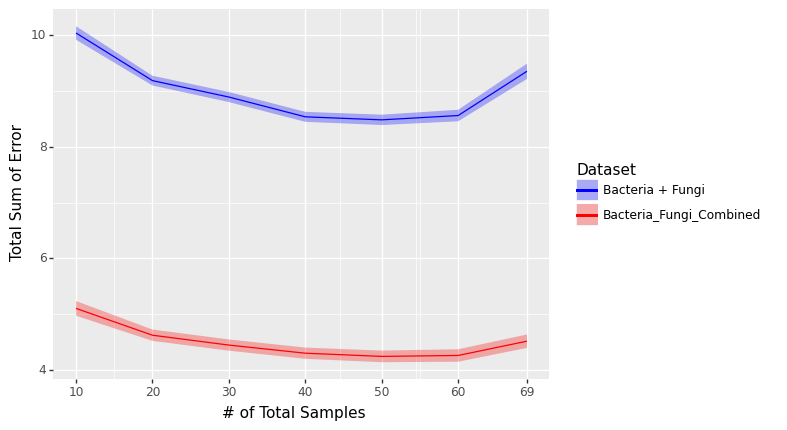

In [12]:
necromass_bact_error_df = get_combined_error_df(
    pd.read_csv(f"{root_results_dir}/2023-07-20_16:44_results.csv")
)

necromass_fungi_error_df = get_combined_error_df(
    pd.read_csv(f"{root_results_dir}/2023-08-03_18:13_results.csv")
)
necromass_bact_plus_fungi_error_df = pd.concat(
    [necromass_bact_error_df, necromass_fungi_error_df]
)


necromass_bact_fungi_combined_error_df = get_combined_error_df(
    pd.read_csv(f"{root_results_dir}/2023-08-18_14:28_results.csv")
)

plot_sum_of_errors(necromass_bact_plus_fungi_error_df, necromass_bact_fungi_combined_error_df)

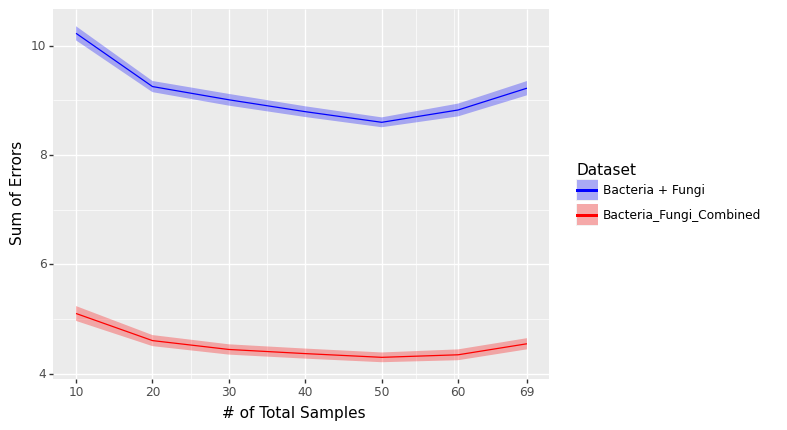

In [20]:
# NECROMASS DF
# date_time = "2023-07-20_16:44"
# date_time = "2023-08-03_18:13"
date_time = "2023-08-18_14:28"
date_time = "2023-08-18_14:28"
date_time = "2023-09-15_18:01"

error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")

bact_df = error_df[error_df["Dataset"] == "necromass_bacteria_genus"]
necromass_bact_error_df = get_combined_error_df(bact_df)
fungi_df = error_df[error_df["Dataset"] == "necromass_fungi_genus"]
necromass_fungi_error_df = get_combined_error_df(fungi_df)
necromass_bact_plus_fungi_error_df = pd.concat(
    [necromass_bact_error_df, necromass_fungi_error_df]
)


bact_fungi_df = error_df[error_df["Dataset"] == "necromass_bacteria_fungi_genus"]
necromass_bact_fungi_combined_error_df = get_combined_error_df(bact_fungi_df)


plot_sum_of_errors(necromass_bact_plus_fungi_error_df, necromass_bact_fungi_combined_error_df)